In [100]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd

# Enable multi-threading
ROOT.ROOT.EnableImplicitMT()

In [25]:
DATA_DIR = "./data/set2/27"
OUT_DIR = "./outputs/"

InputFile = DATA_DIR + "/SiPM_data.root"

file = ROOT.TFile(InputFile)

file.ls()

TFile**		./data/set2/27/SiPM_data.root	
 TFile*		./data/set2/27/SiPM_data.root	
  KEY: TTree	tree;15	SiPM Data [current cycle]
  KEY: TTree	tree;14	SiPM Data [backup cycle]


In [26]:
tree = file.Get("tree")

#Get the number of entries in the tree
nEntries = tree.GetEntries()
print("Number of entries in the tree: ", nEntries)

#Get the number of branches in the tree
nBranches = tree.GetNbranches()
print("Number of branches in the tree: ", nBranches)

#print the leaf names
for leaf in tree.GetListOfLeaves():
    print(leaf.GetName())


Number of entries in the tree:  41943
Number of branches in the tree:  10
RecordLength
BoardID
EventNumber
Pattern
TriggerTimeStamp
DCOffset
StartIndexCell
SamplesTrigger
SamplesCh0
SamplesCh1


In [101]:
rdf = ROOT.RDataFrame("tree", InputFile)

pdf = pd.DataFrame(rdf.AsNumpy())


# List all columns in the DataFrame
columns = rdf.GetColumnNames()


Available columns: { "BoardID", "DCOffset", "EventNumber", "Pattern", "RecordLength", "SamplesCh0", "SamplesCh1", "SamplesTrigger", "StartIndexCell", "TriggerTimeStamp" }
Number of samples: 1024
Mean: 275.60
RMS: 294.75


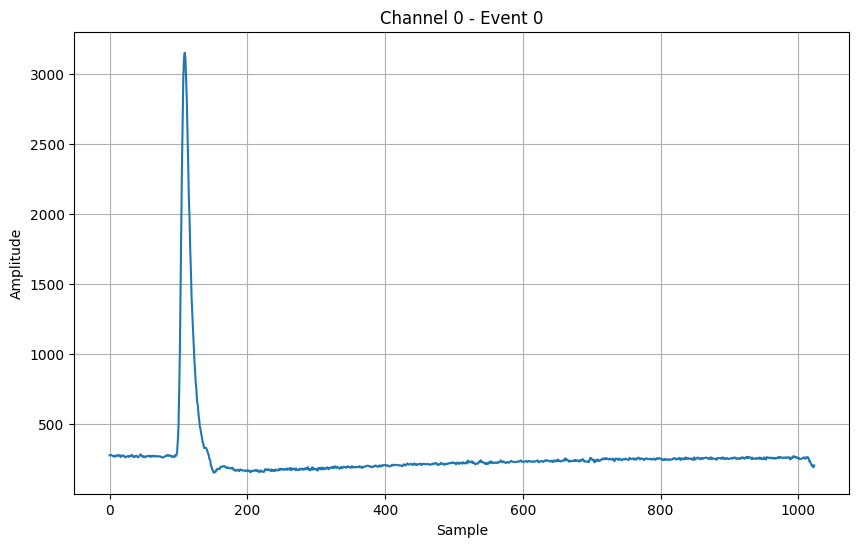

In [59]:
# Filter for EventNumber == 0
event_cut = rdf.Filter("EventNumber == 0")

# Extract the samples for the specific event
data = event_cut.AsNumpy(columns=["SamplesCh0"])

# The data is a dictionary, so we need to access the 'SamplesCh0' key
samples = data['SamplesCh0'][0]  # [0] because there's only one event after filtering

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(samples)
plt.title("Channel 0 - Event 0")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

# Print some statistics
print(f"Number of samples: {len(samples)}")
print(f"Mean: {np.mean(samples):.2f}")
print(f"RMS: {np.std(samples):.2f}")

# Show the plot
plt.show()


Number of samples: 1024
Mean: 460.16
RMS: 317.73


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


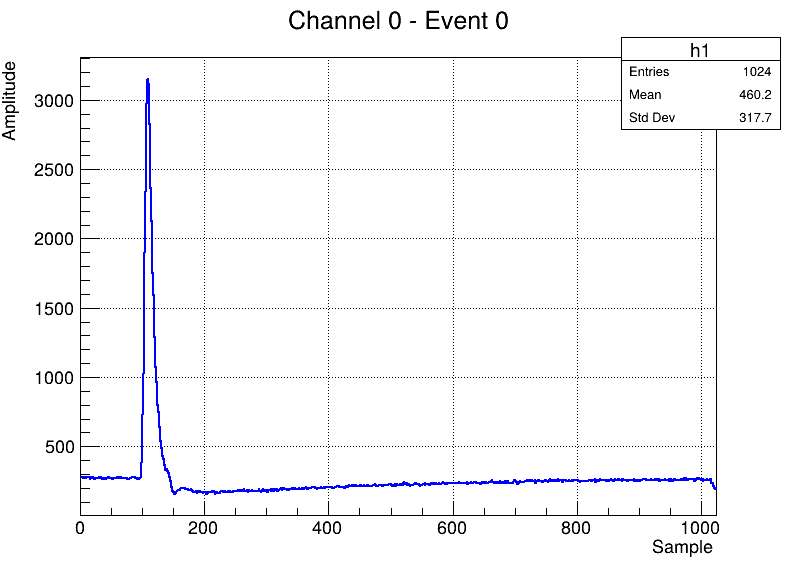

In [61]:
# Create a ROOT canvas
canvas = ROOT.TCanvas("c1", "Channel 0 - Event 0", 800, 600)

# Create a histogram
hist = ROOT.TH1F("h1", "Channel 0 - Event 0", len(samples), 0, len(samples))

# Fill the histogram
for i, sample in enumerate(samples, 1):
    hist.SetBinContent(i, sample)

# Set histogram style
hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.GetXaxis().SetTitle("Sample")
hist.GetYaxis().SetTitle("Amplitude")

# Draw the histogram
hist.Draw("HIST")

# Add a grid
canvas.SetGrid()

# Print some statistics
print(f"Number of samples: {len(samples)}")
print(f"Mean: {hist.GetMean():.2f}")
print(f"RMS: {hist.GetRMS():.2f}")

# Show the canvas
canvas.Draw()


In [119]:
pdf = pd.DataFrame(rdf.AsNumpy())

# List all columns in the DataFrame
columns = rdf.GetColumnNames() 

print(columns)

{ "BoardID", "DCOffset", "EventNumber", "Pattern", "RecordLength", "SamplesCh0", "SamplesCh1", "SamplesTrigger", "StartIndexCell", "TriggerTimeStamp" }


In [120]:
pdf

,BoardID,DCOffset,EventNumber,Pattern,RecordLength,SamplesCh0,SamplesCh1,SamplesTrigger,StartIndexCell,TriggerTimeStamp
0,31,45874,41846,0,1024,"[262.0, 262.01776123046875, 267.9543151855469,...","[387.0, 387.00592041015625, 388.9543151855469,...","[59.0, 59.01183319091797, 63.006526947021484, ...",57,923247396
1,31,45874,41847,0,1024,"[275.0, 274.9762268066406, 271.97027587890625,...","[395.0, 394.984130859375, 392.9554138183594, 3...","[74.0, 74.07928466796875, 83.88109588623047, 7...",910,923364584
2,31,45874,41848,0,1024,"[264.0, 263.9996337890625, 260.001708984375, 2...","[391.0, 390.9999084472656, 390.00042724609375,...","[67.0, 67.00018310546875, 68.9991455078125, 68...",698,923481771
3,31,45874,41849,0,1024,"[269.0, 269.01763916015625, 271.9565124511719,...","[391.0, 391.0235290527344, 394.9673767089844, ...","[71.0, 71.08233642578125, 84.91300964355469, 7...",529,923598959
4,31,45874,41850,0,1024,"[260.0, 260.0, 263.9777526855469, 264.99166870...","[379.0, 379.0, 388.94439697265625, 390.9833679...","[59.0, 59.0, 61.98331832885742, 68.94173431396...",315,923716146
...,...,...,...,...,...,...,...,...,...,...
41938,31,45874,2984,0,1024,"[262.0, 262.0, 260.03546142578125, 266.8031921...","[380.0, 380.0, 384.9113464355469, 384.02810668...","[65.0, 65.0, 77.76947021484375, 74.11246490478...",401,940666980
41939,31,45874,2985,0,1024,"[257.0, 257.0, 260.979736328125, 272.908538818...","[383.0, 383.0, 386.979736328125, 391.961883544...","[71.0, 71.0, 60.05575180053711, 77.86281585693...",230,940784168
41940,31,45874,2986,0,1024,"[264.0, 264.0069885253906, 265.02764892578125,...","[386.0, 385.95098876953125, 379.1935729980469,...","[65.0, 65.08402252197266, 76.8340835571289, 65...",14,940901355
41941,31,45874,2987,0,1024,"[282.0, 281.953125, 274.9353332519531, 269.747...","[387.0, 387.06695556640625, 396.90948486328125...","[83.0, 83.01338958740234, 84.76722717285156, 6...",868,941018543



Mean of first 30 elements for first few events:
Event 41846: 264.35
Event 41847: 269.48
Event 41848: 267.13
Event 41849: 269.97
Event 41850: 266.95

Overall statistics of MeanFirst30:
  Number of events: 41943
  Average of MeanFirst30: 265.85
  Std Dev of MeanFirst30: 2.28


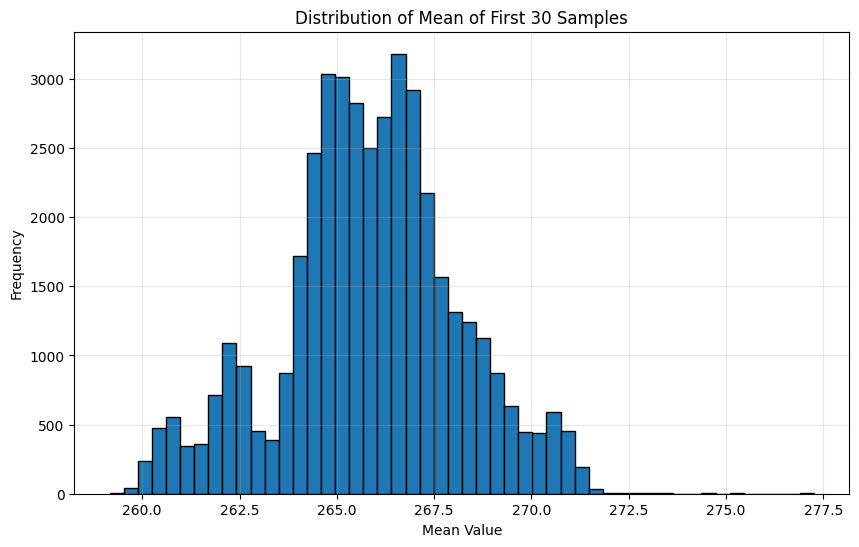


ROOT version: 6.32.00


In [146]:
import ROOT
import numpy as np

# Enable multi-threading
ROOT.ROOT.EnableImplicitMT()

# Create a RDataFrame
rdf = ROOT.RDataFrame("tree", "./data/set2/27/SiPM_data.root")

# Get the data as numpy arrays
data = rdf.AsNumpy(["EventNumber", "SamplesCh0"])

# Calculate mean of first 30 elements for each event
mean_first_30 = []
for samples in data["SamplesCh0"]:
    # Convert RVec to numpy array and then calculate mean
    np_samples = np.array(samples)
    mean_first_30.append(np.mean(np_samples[:30]))

# Print results for the first few events
print("\nMean of first 30 elements for first few events:")
for i in range(min(5, len(data["EventNumber"]))):
    print(f"Event {data['EventNumber'][i]}: {mean_first_30[i]:.2f}")

# Calculate overall statistics
print("\nOverall statistics of MeanFirst30:")
print(f"  Number of events: {len(mean_first_30)}")
print(f"  Average of MeanFirst30: {np.mean(mean_first_30):.2f}")
print(f"  Std Dev of MeanFirst30: {np.std(mean_first_30):.2f}")

# If you want to plot a histogram of the means
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mean_first_30, bins=50, edgecolor='black')
plt.title("Distribution of Mean of First 30 Samples")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.savefig("mean_first_30_distribution.png")
plt.show()

# Print ROOT version
print(f"\nROOT version: {ROOT.gROOT.GetVersion()}")